# Superconductivity data analysis

## Introduction

The Superconductivity data set was [shared](https://archive.ics.uci.edu/ml/datasets/Superconductivty+Data) by Kam Hamidieh using the CC BY 4.0 license. This data set is based on the research performed at [NIMS](http://supercon.nims.go.jp/index_en.html), and reports the chemical composition and some physical constants pertaining 21,263 different superconductors along with the Superconducting Critical Temperature ($T_C$) of each compound. The purpose of the current analysis is to use the physical and chemical properties of the materials to train a series of machine learning algorithms and predict the values of $T_C$ for a testing subset. Hence, the data will be divided into training and testing sets.

More information about superconductivity in general can be found [here](https://authors.library.caltech.edu/43047/1/FEYrmp57.pdf) and [here](https://www.nature.com/articles/s42254-021-00324-3). You may also read the [original publication by K. Hamidie](https://doi.org/10.1016/j.commatsci.2018.07.052).

In [1]:
# install packages required
! pip install wget

Defaulting to user installation because normal site-packages is not writeable


In [2]:
# data importing packages
import wget
import zipfile
import numpy as np
import pandas as pd
# data visualization packages
from matplotlib import pyplot as plt
import seaborn as sb
# data modelling packages
from sklearn import linear_model
from sklearn import metrics
from sklearn import neighbors
# from sklearn import preprocessing
from sklearn import tree
from sklearn import ensemble

## Import and inspect data

In [3]:
zf_link = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00464/superconduct.zip'
wget.download(zf_link)

100% [..........................................................................] 8300005 / 8300005

'superconduct.zip'

In [4]:
zf_name = 'superconduct.zip'
zf = zipfile.ZipFile(zf_name)
zf.namelist() # lists files inside zip folder

['unique_m.csv', 'train.csv']

In [5]:
# now read your csv file
df_chemical = pd.read_csv(zf.open('unique_m.csv'))
df_physical = pd.read_csv(zf.open('train.csv'))

In [6]:
df_chemical.head(10)

,H,He,Li,Be,B,C,N,O,F,Ne,...,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp,material
0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,29.0,Ba0.2La1.8Cu1O4
1,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,26.0,Ba0.1La1.9Ag0.1Cu0.9O4
2,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,19.0,Ba0.1La1.9Cu1O4
3,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,22.0,Ba0.15La1.85Cu1O4
4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,23.0,Ba0.3La1.7Cu1O4
5,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,23.0,Ba0.5La1.5Cu1O4
6,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,11.0,Ba1La1Cu1O4
7,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,33.0,Sr0.1La1.9Cu1O4
8,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,36.0,Sr0.15La1.85Cu1O4
9,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,31.0,Sr0.2La1.8Cu1O4


In [7]:
df_chemical.columns

Index(['H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne', 'Na', 'Mg', 'Al',
       'Si', 'P', 'S', 'Cl', 'Ar', 'K', 'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn',
       'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr', 'Rb',
       'Sr', 'Y', 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In',
       'Sn', 'Sb', 'Te', 'I', 'Xe', 'Cs', 'Ba', 'La', 'Ce', 'Pr', 'Nd', 'Pm',
       'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Hf', 'Ta',
       'W', 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'Po', 'At',
       'Rn', 'critical_temp', 'material'],
      dtype='object')

In [8]:
df_physical.head(10)

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0
5,4,88.944468,57.795044,66.361592,36.098926,1.181795,1.225203,122.90607,20.687458,51.968828,...,2.214286,2.213364,2.181543,1.368922,1.141474,1,1.000000,0.433013,0.410326,23.0
6,4,88.944468,57.682296,66.361592,36.069470,1.181795,1.316857,122.90607,10.765639,51.968828,...,2.142857,2.213364,2.119268,1.368922,1.194453,1,0.857143,0.433013,0.349927,11.0
7,4,76.517718,57.175142,59.310096,35.891368,1.197273,0.943560,122.90607,36.451199,44.289459,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,33.0
8,4,76.517718,56.808817,59.310096,35.773432,1.197273,0.981880,122.90607,34.833160,44.289459,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,36.0
9,4,76.517718,56.442492,59.310096,35.655884,1.197273,1.016495,122.90607,33.215121,44.289459,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,31.0


In [9]:
df_physical.columns

Index(['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass',
       'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass',
       'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass',
       'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie',
       'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie',
       'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie',
       'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius',
       'wtd_gmean_atomic_radius', 'entropy_atomic_radius',
       'wtd_entropy_atomic_radius', 'range_atomic_radius',
       'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius',
       'mean_Density', 'wtd_mean_Density', 'gmean_Density',
       'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density',
       'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density',
       'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity',
       'gmean_

In [10]:
# join physical and chemical data in a single data frame
df = df_physical.iloc[:, 1:81].join(df_chemical.iloc[:, :88])
df.head(10)

,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,...,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp,material
0,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,53.622535,...,0.0,0.0,0.0,0.0,0.0,0,0,0,29.0,Ba0.2La1.8Cu1O4
1,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,53.979870,...,0.0,0.0,0.0,0.0,0.0,0,0,0,26.0,Ba0.1La1.9Ag0.1Cu0.9O4
2,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,53.656268,...,0.0,0.0,0.0,0.0,0.0,0,0,0,19.0,Ba0.1La1.9Cu1O4
3,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,53.639405,...,0.0,0.0,0.0,0.0,0.0,0,0,0,22.0,Ba0.15La1.85Cu1O4
4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,53.588771,...,0.0,0.0,0.0,0.0,0.0,0,0,0,23.0,Ba0.3La1.7Cu1O4
5,88.944468,57.795044,66.361592,36.098926,1.181795,1.225203,122.90607,20.687458,51.968828,53.521150,...,0.0,0.0,0.0,0.0,0.0,0,0,0,23.0,Ba0.5La1.5Cu1O4
6,88.944468,57.682296,66.361592,36.069470,1.181795,1.316857,122.90607,10.765639,51.968828,53.351558,...,0.0,0.0,0.0,0.0,0.0,0,0,0,11.0,Ba1La1Cu1O4
7,76.517718,57.175142,59.310096,35.891368,1.197273,0.943560,122.90607,36.451199,44.289459,52.924140,...,0.0,0.0,0.0,0.0,0.0,0,0,0,33.0,Sr0.1La1.9Cu1O4
8,76.517718,56.808817,59.310096,35.773432,1.197273,0.981880,122.90607,34.833160,44.289459,52.533207,...,0.0,0.0,0.0,0.0,0.0,0,0,0,36.0,Sr0.15La1.85Cu1O4
9,76.517718,56.442492,59.310096,35.655884,1.197273,1.016495,122.90607,33.215121,44.289459,52.136769,...,0.0,0.0,0.0,0.0,0.0,0,0,0,31.0,Sr0.2La1.8Cu1O4


In [11]:
df.shape

(21263, 168)

## Exploratory Data Analysis

Let us have visualize some characteristics of the entire data set, starting by the distribution of the critical temperature values and its bivariate relation with the mean values of each physical property in the data.

<AxesSubplot:xlabel='critical_temp', ylabel='Count'>

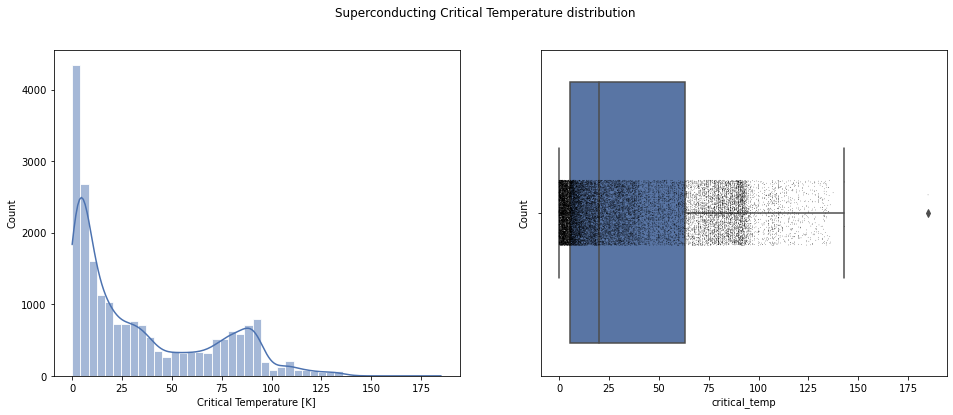

In [12]:
fig, axes = plt.subplots(1, 2, figsize = (16, 6))
fig.suptitle("Superconducting Critical Temperature distribution")
sb.set_theme(font_scale = 1.3)
g1 = sb.histplot(ax = axes[0], data = df, x = "critical_temp", kde = True)
g1.set_xlabel("Critical Temperature [K]")
g1.set_ylabel("Count")
g2 = sb.boxplot(ax = axes[1], data = df, x = "critical_temp")
g2.set_xlabel("Critical Temperature [K]")
g2.set_ylabel("Count")
sb.stripplot(ax = axes[1], data = df, x = "critical_temp", size = 0.5, alpha = 0.4, color = "black", linewidth = 0.3)

<AxesSubplot:xlabel='mean_Density', ylabel='critical_temp'>

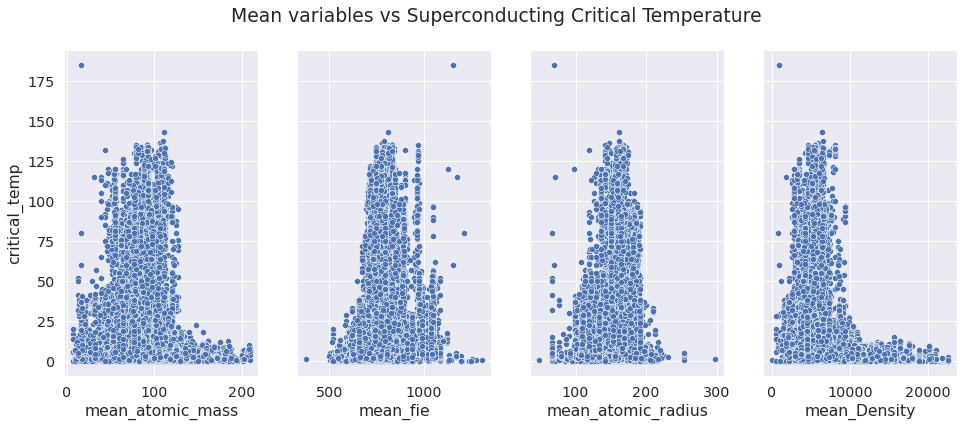

In [13]:
fig1, axes1 = plt.subplots(1, 4, figsize = (16, 6), sharey = True)
fig1.suptitle("Mean variables vs Superconducting Critical Temperature")
sb.scatterplot(ax = axes1[0], data = df, x = "mean_atomic_mass", y = "critical_temp")
sb.scatterplot(ax = axes1[1], data = df, x = "mean_fie", y = "critical_temp")
sb.scatterplot(ax = axes1[2], data = df, x = "mean_atomic_radius", y = "critical_temp")
sb.scatterplot(ax = axes1[3], data = df, x = "mean_Density", y = "critical_temp")

<AxesSubplot:xlabel='mean_Valence', ylabel='critical_temp'>

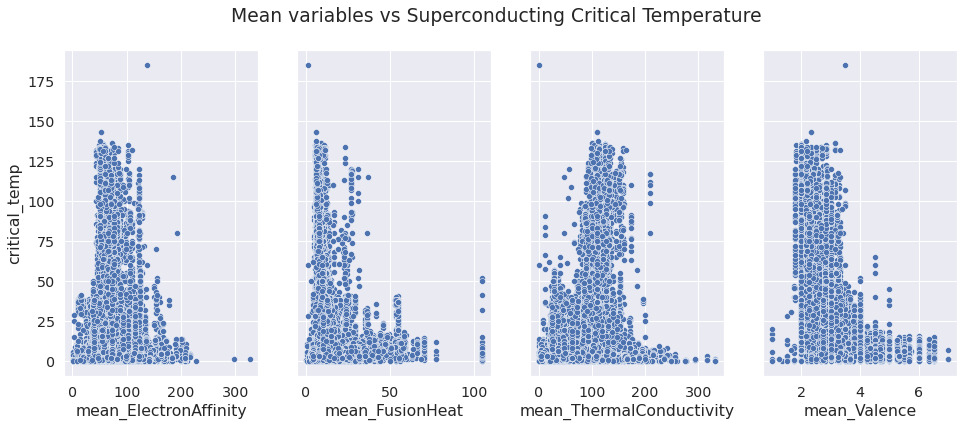

In [14]:
fig2, axes2 = plt.subplots(1, 4, figsize = (16, 6), sharey = True)
fig2.suptitle("Mean variables vs Superconducting Critical Temperature")
sb.scatterplot(ax = axes2[0], data = df, x = "mean_ElectronAffinity", y = "critical_temp")
sb.scatterplot(ax = axes2[1], data = df, x = "mean_FusionHeat", y = "critical_temp")
sb.scatterplot(ax = axes2[2], data = df, x = "mean_ThermalConductivity", y = "critical_temp")
sb.scatterplot(ax = axes2[3], data = df, x = "mean_Valence", y = "critical_temp")

From the plots above, we observe that the distribution function of the critical temperature and exhibits local maxima close to absolute zero, $T_C$=35 K, and $T_C$=90 K. Additionally, there is no clear linear relation between the critical temperature and the mean physical properties.

Let us now determine if there is some correlation between the reported mean values of the physical properties.

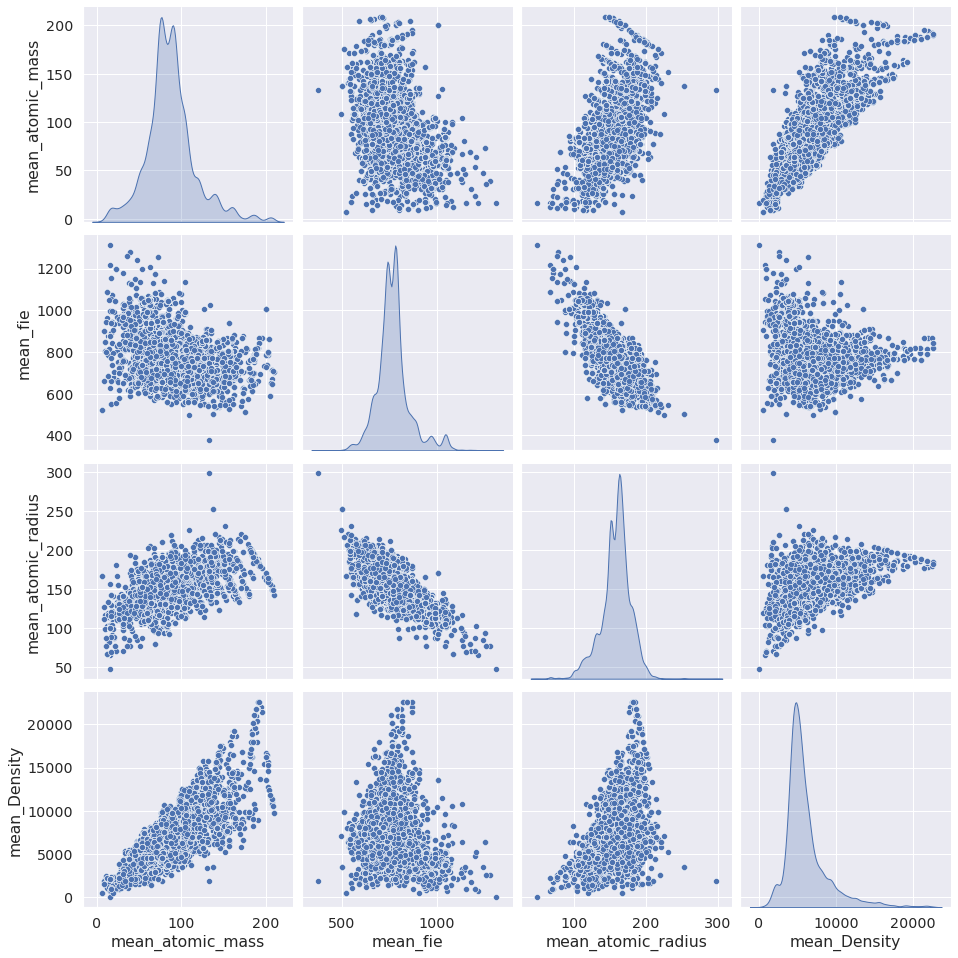

In [15]:
mean_columns = ["mean_atomic_mass",
                "mean_fie",
                "mean_atomic_radius",
                "mean_Density"]
sb.pairplot(data = df[mean_columns], diag_kind = "kde", height = 3.4)

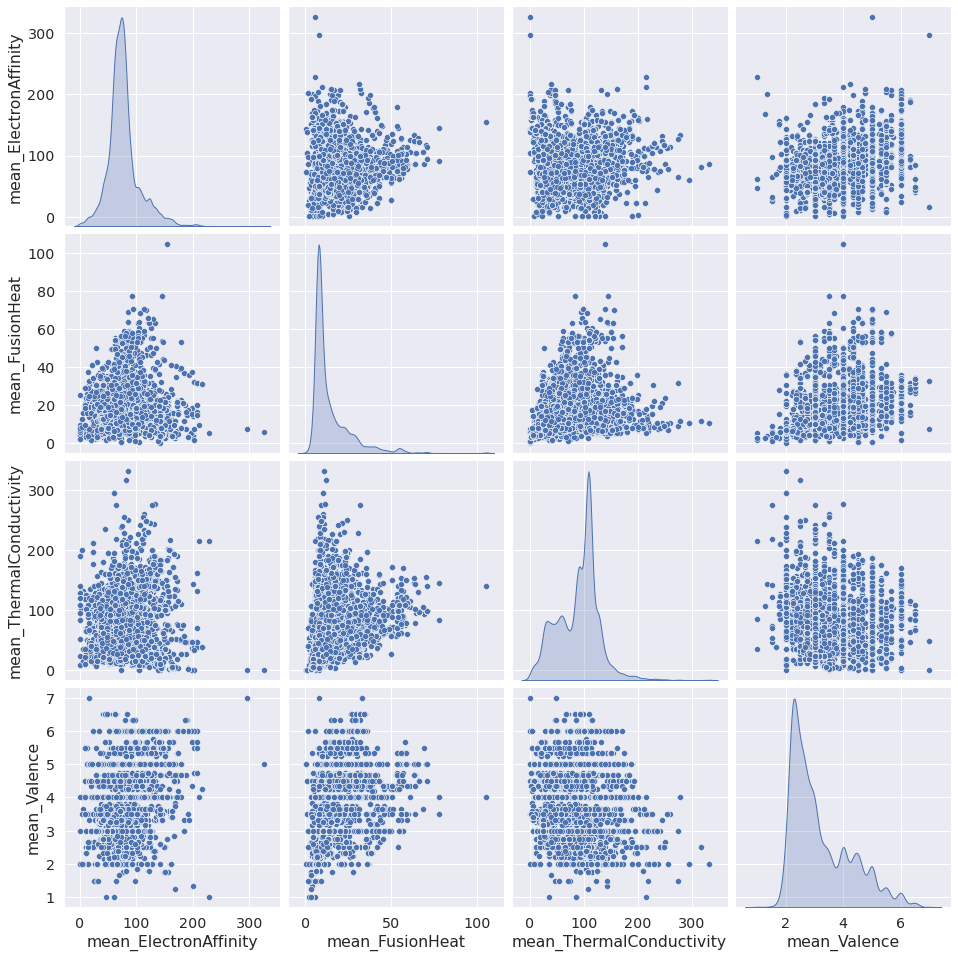

In [16]:
mean_columns = ["mean_ElectronAffinity",
                "mean_FusionHeat",
                "mean_ThermalConductivity",
                "mean_Valence"]
sb.pairplot(data = df[mean_columns], diag_kind = "kde", height = 3.4)

The last two plots sugest there is no considerable correlation between the physical properties mean values. Hence, we should consider all of them to determine their role in predicting the value of $T_C$.

## Train and Test data sets

Let us split the data in half into training and testing sets

In [17]:
np.random.seed(314159) # fixing random state for reproducibility
msk = np.random.rand(len(df)) < 0.5
train_x = df[msk].iloc[:, 0:166]
train_y = df[msk].loc[:, "critical_temp"]
test_x = df[~msk].iloc[:, 0:166]
test_y = df[~msk].loc[:, "critical_temp"]
[train_x.shape, test_x.shape]

[(10630, 166), (10633, 166)]

## Data modelling and evaluation

Next, we will train a few regression models and calculate their out-of-sample accuracy in the testing set. The models to be trained include: 

* Multiple linear regression
* Lasso regression
* k-Nearest Neighbors regressor
* Decision Tree regressor
* AdaBoost regressor

In [18]:
# Auxiliary functions
def print_performance(estimate, real_value):
    print('Mean Absolute Error: %.2f' % np.mean(np.absolute(estimate - real_value)))
    print('Root Mean Square Error (RMSE): %.2f' % np.sqrt(np.mean((estimate - real_value)**2)))
    print('R2-score: %.2f' % metrics.r2_score(real_value, estimate))

def plot_diagrams(estimate, real_value, title):
    fig, axes = plt.subplots(1, 2, figsize = (16, 6))
    fig.suptitle(title, fontsize = 14)
    df = pd.DataFrame({"actual": real_value, "predicted": estimate})
    g1 = sb.histplot(ax = axes[0], data = pd.melt(df), x = "value", hue = "variable", kde = True)
    g1.set_xlabel("Critical Temperature [K]")
    g1.set_ylabel("Count")
    g2 = sb.boxplot(ax = axes[1], data = pd.melt(df), x = "value", y = "variable")
    g2.set_xlabel("Critical Temperature [K]")
    g2.set_ylabel("")

In [19]:
# Multiple Linear Regression
regr = linear_model.LinearRegression()
regr.fit(train_x, train_y)
y_hat_mlr = regr.predict(test_x)
print_performance(y_hat_mlr, test_y)

Mean Absolute Error: 12.73
Root Mean Square Error (RMSE): 29.68
R2-score: 0.25


Since the Multiple Linear Regression model offers a poor out-of-sample performance, we will refrain from plotting its results

In [20]:
# Lasso Regression
lasso = linear_model.LassoCV()
lasso.fit(train_x, train_y)
y_hat_lasso = lasso.predict(test_x)
print_performance(y_hat_lasso, test_y)

Mean Absolute Error: 17.05
Root Mean Square Error (RMSE): 21.83
R2-score: 0.59


Since the Lasso Regression model does not offer a high out-of-sample performance, we will refrain from plotting its results

In [21]:
# K-Neighbors Regressor
knr = neighbors.KNeighborsRegressor()
knr.fit(train_x, train_y)
y_hat_knr = knr.predict(test_x)
print_performance(y_hat_knr, test_y)

Mean Absolute Error: 7.51
Root Mean Square Error (RMSE): 13.05
R2-score: 0.85


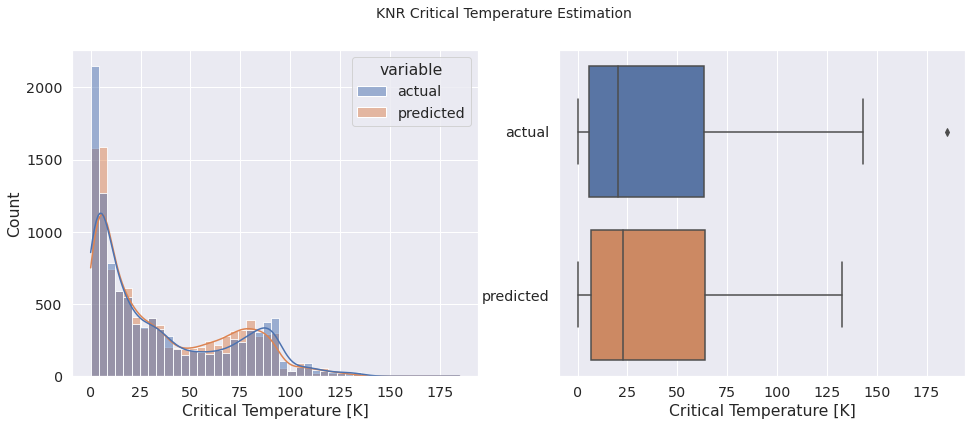

In [22]:
plot_diagrams(y_hat_knr, test_y, "KNR Critical Temperature Estimation")

In [23]:
# Decision Tree Regressor
dtr = tree.DecisionTreeRegressor()
dtr.fit(train_x, train_y)
y_hat_dtr = dtr.predict(test_x)
print_performance(y_hat_dtr, test_y)

Mean Absolute Error: 6.77
Root Mean Square Error (RMSE): 12.87
R2-score: 0.86


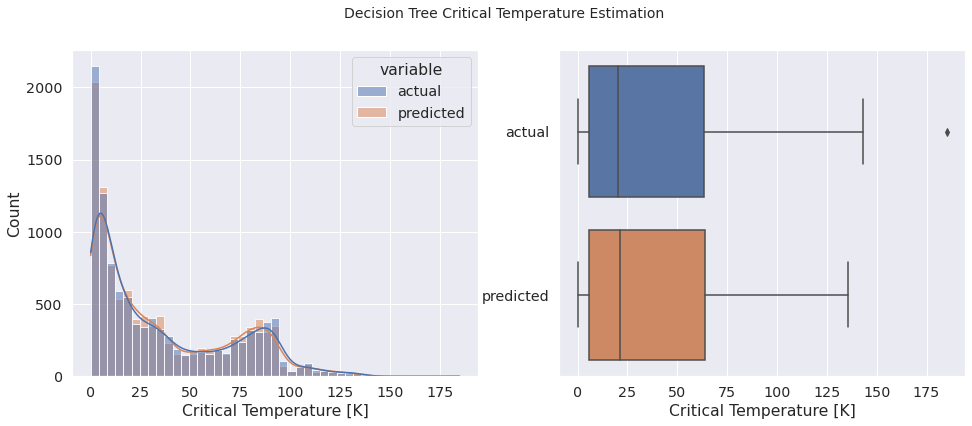

In [24]:
plot_diagrams(y_hat_dtr, test_y, "Decision Tree Critical Temperature Estimation")

In [25]:
# Ada Boost Regressor
ada = tree.DecisionTreeRegressor()
ada.fit(train_x, train_y)
y_hat_ada = ada.predict(test_x)
print_performance(y_hat_ada, test_y)

Mean Absolute Error: 6.82
Root Mean Square Error (RMSE): 13.18
R2-score: 0.85


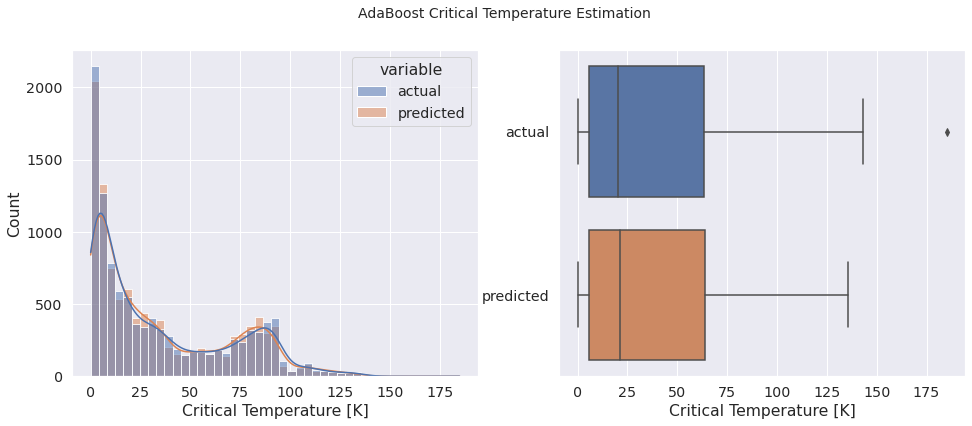

In [26]:
plot_diagrams(y_hat_ada, test_y, "AdaBoost Critical Temperature Estimation")

From the results above, we observe that the Multiple Linear and Lasso Regression models offer substantially lower out-of-sample accuracy values ($R^2$=0.15, and 0.60, respectivelly) than the KNN, Decision Tree and AdaBoost Regressor models ($R^2$ = 0.85, 0.87, 0.86, respectivelly). Hence, we will build an ensemble model with the three better performing methods, and test its performance in the separate test set.

### Ensemble model

In [27]:
# Ensemble
y_hat = (y_hat_knr + y_hat_dtr + y_hat_ada)/3
print_performance(y_hat, test_y)

Mean Absolute Error: 6.37
Root Mean Square Error (RMSE): 11.50
R2-score: 0.89


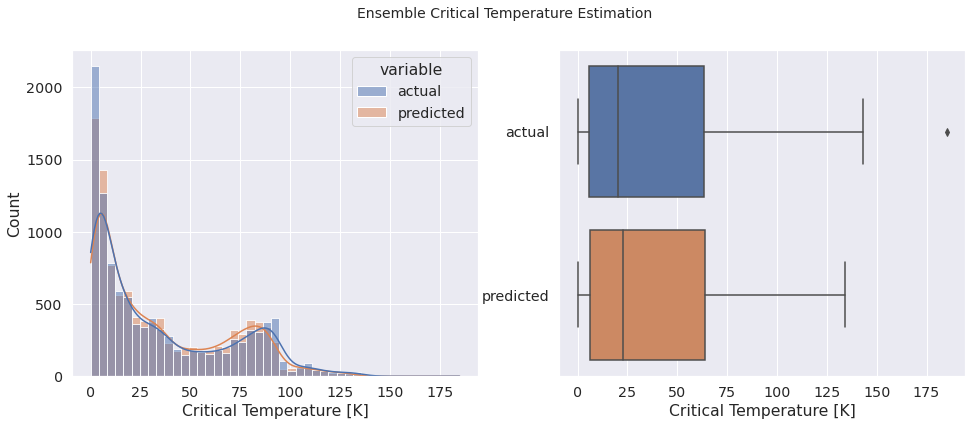

In [28]:
plot_diagrams(y_hat, test_y, "Ensemble Critical Temperature Estimation")

## Conclusion

A careful selection of training model allows us to predict the critical temperature of a superconducting sample with a RMSE value of approximately 11.20 using the compound chemical composition and mean physical values as predictors. Nonetheless, we shall remember that only superconducting samples were taken into consideration. Thus, the trained algorithm is not intended to predict whether a new compound will reach the superconducting state upon cooling or not.